In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Load the dataset1
df1=pd.read_csv('churn_data.csv')

In [5]:
#Load the dataset2
df2=pd.read_csv('customer_data.csv')

In [6]:
#Load the dataset3
df3=pd.read_csv('internet_data.csv')

In [7]:
#merge all three dataset into single dataset
df_col2_col3  = pd.merge(df2,df3,on = 'customerID')
df_new_col  = pd.merge(df_col2_col3,df1,on = 'customerID')
df_new_col

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
#shape of the data set
df_new_col.shape

(7043, 21)

In [9]:
#checking the  column name
df_new_col.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
#info about the dataset
df_new_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#churn count
df_new_col['Churn'].value_counts()/df_new_col['Churn'].count() 

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [12]:
#checking the data type
df_new_col.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#descriptive analysis for numerical data
df_new_col.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
#churn count
df_new_col['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
#churn ratio
df_new_col['Churn'].value_counts()/len(df_new_col['Churn'])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [16]:
#convert the TotalCharges object to integer datatype
df_new_col['TotalCharges'] = pd.to_numeric(df_new_col.TotalCharges, errors='coerce') 

In [17]:
#checking the null values
df_new_col.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#checking which are null values
df_new_col[df_new_col['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No phone service,DSL,Yes,No,Yes,...,Yes,No,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,...,Yes,No,0,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,...,Yes,No,0,Yes,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df_new_col[df_new_col['tenure']==0].index 
df_new_col.drop(labels=df_new_col[df_new_col['tenure']==0].index, axis=0, inplace=True) 
df_new_col[df_new_col['tenure']==0].index

Int64Index([], dtype='int64')

In [20]:
#filling the null values with mean in Total Charges
df_new_col.fillna(df_new_col["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
#droping the customer id
df_new_col=df_new_col.drop(['customerID'],axis=1)
df_new_col.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
#checking the churn value with gender
df_new_col['gender'].value_counts()/df_new_col['Churn'].count() 

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [23]:
#churn count
df_new_col['Churn'].value_counts()/df_new_col['Churn'].count() 

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

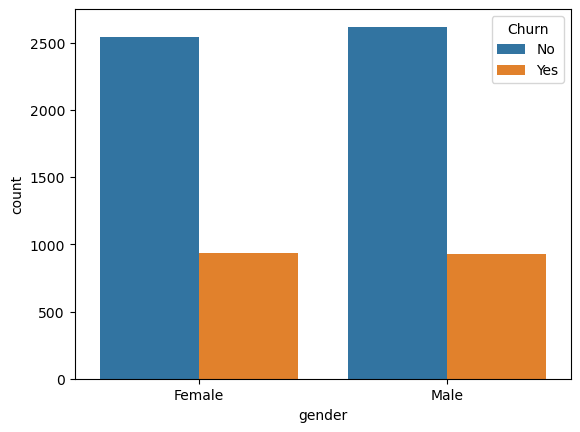

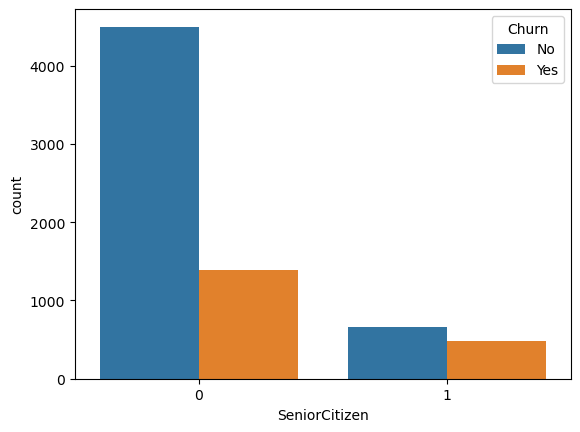

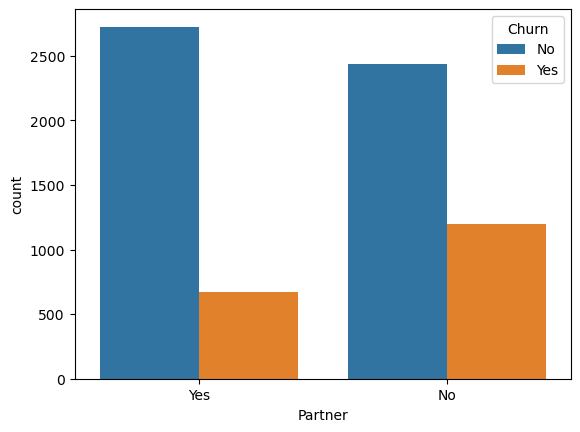

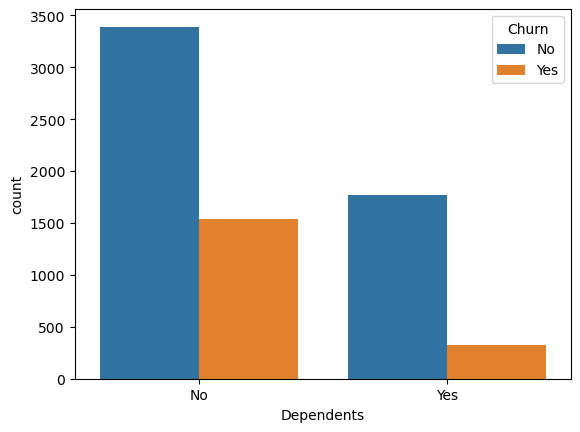

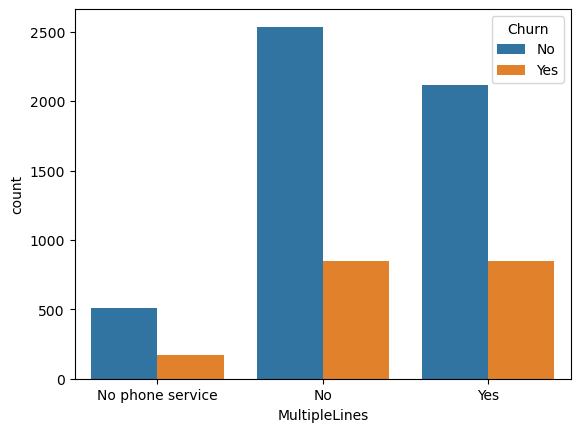

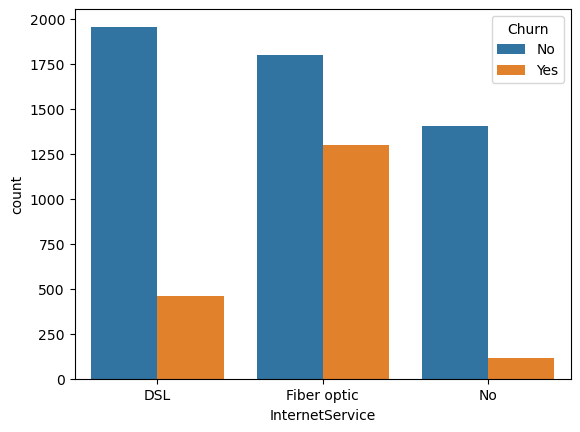

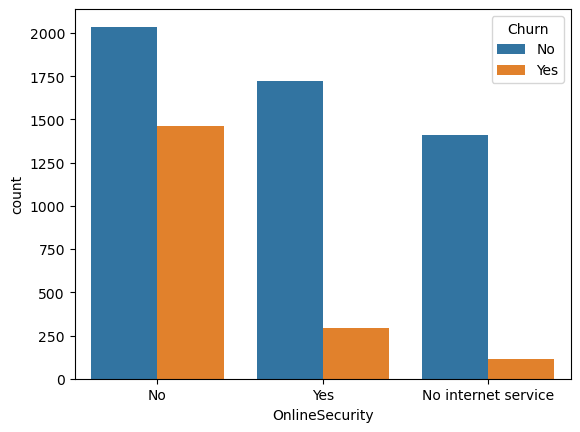

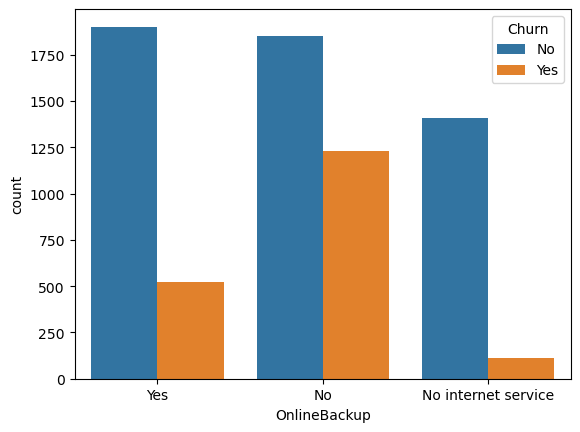

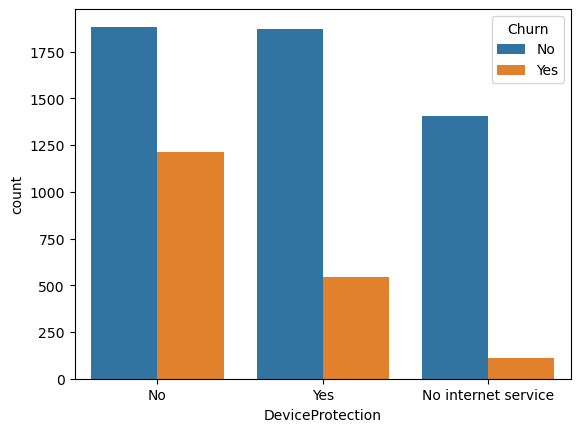

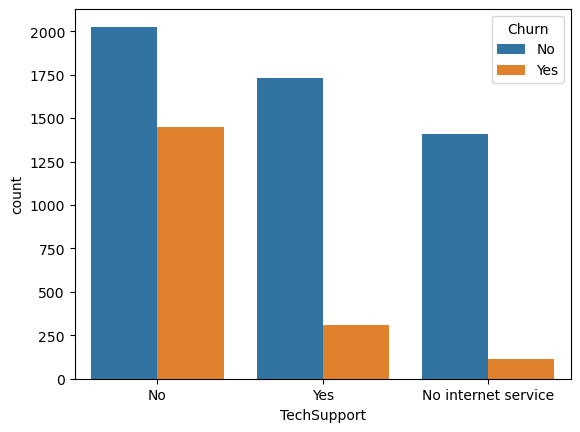

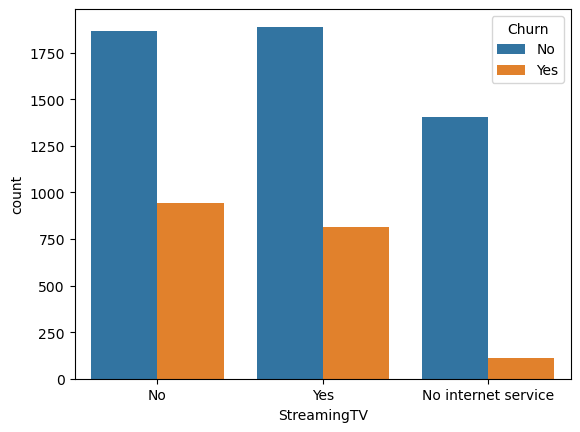

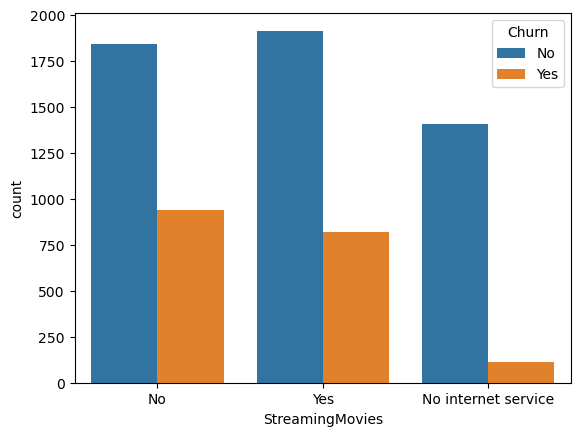

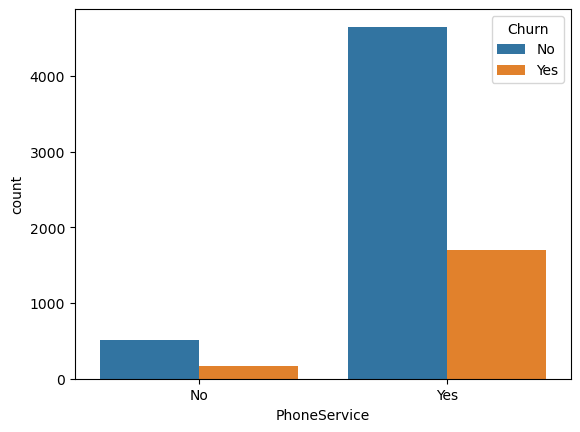

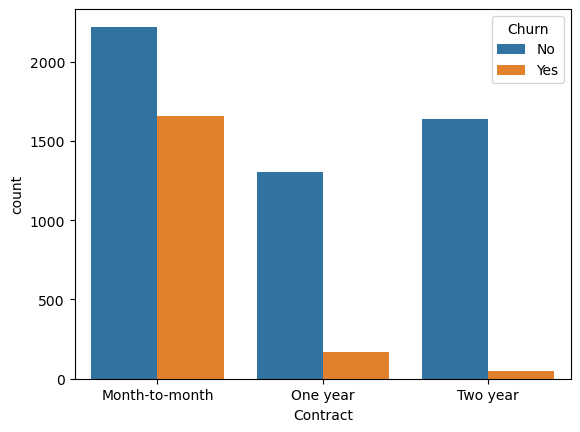

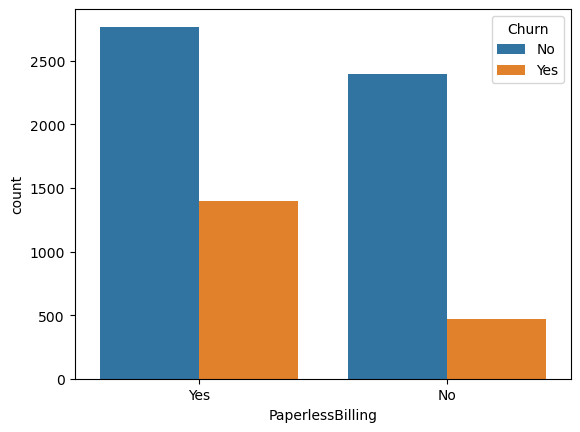

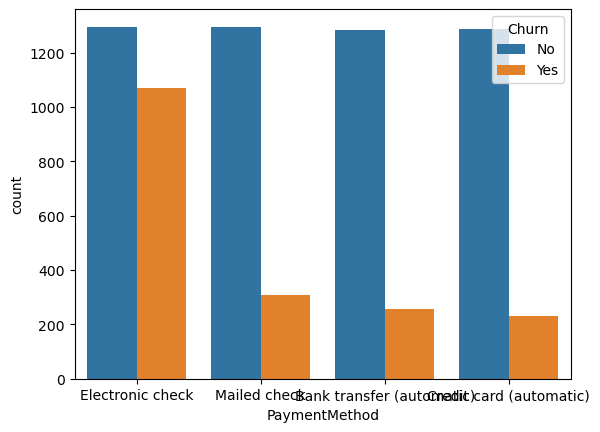

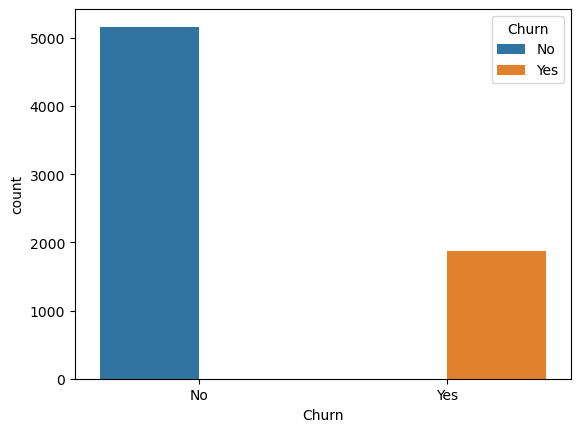

In [24]:
#checking the univarient anlaysis
for i,predict in enumerate(df_new_col.drop(columns = ['MonthlyCharges','TotalCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data = df_new_col,x = predict,hue = 'Churn')

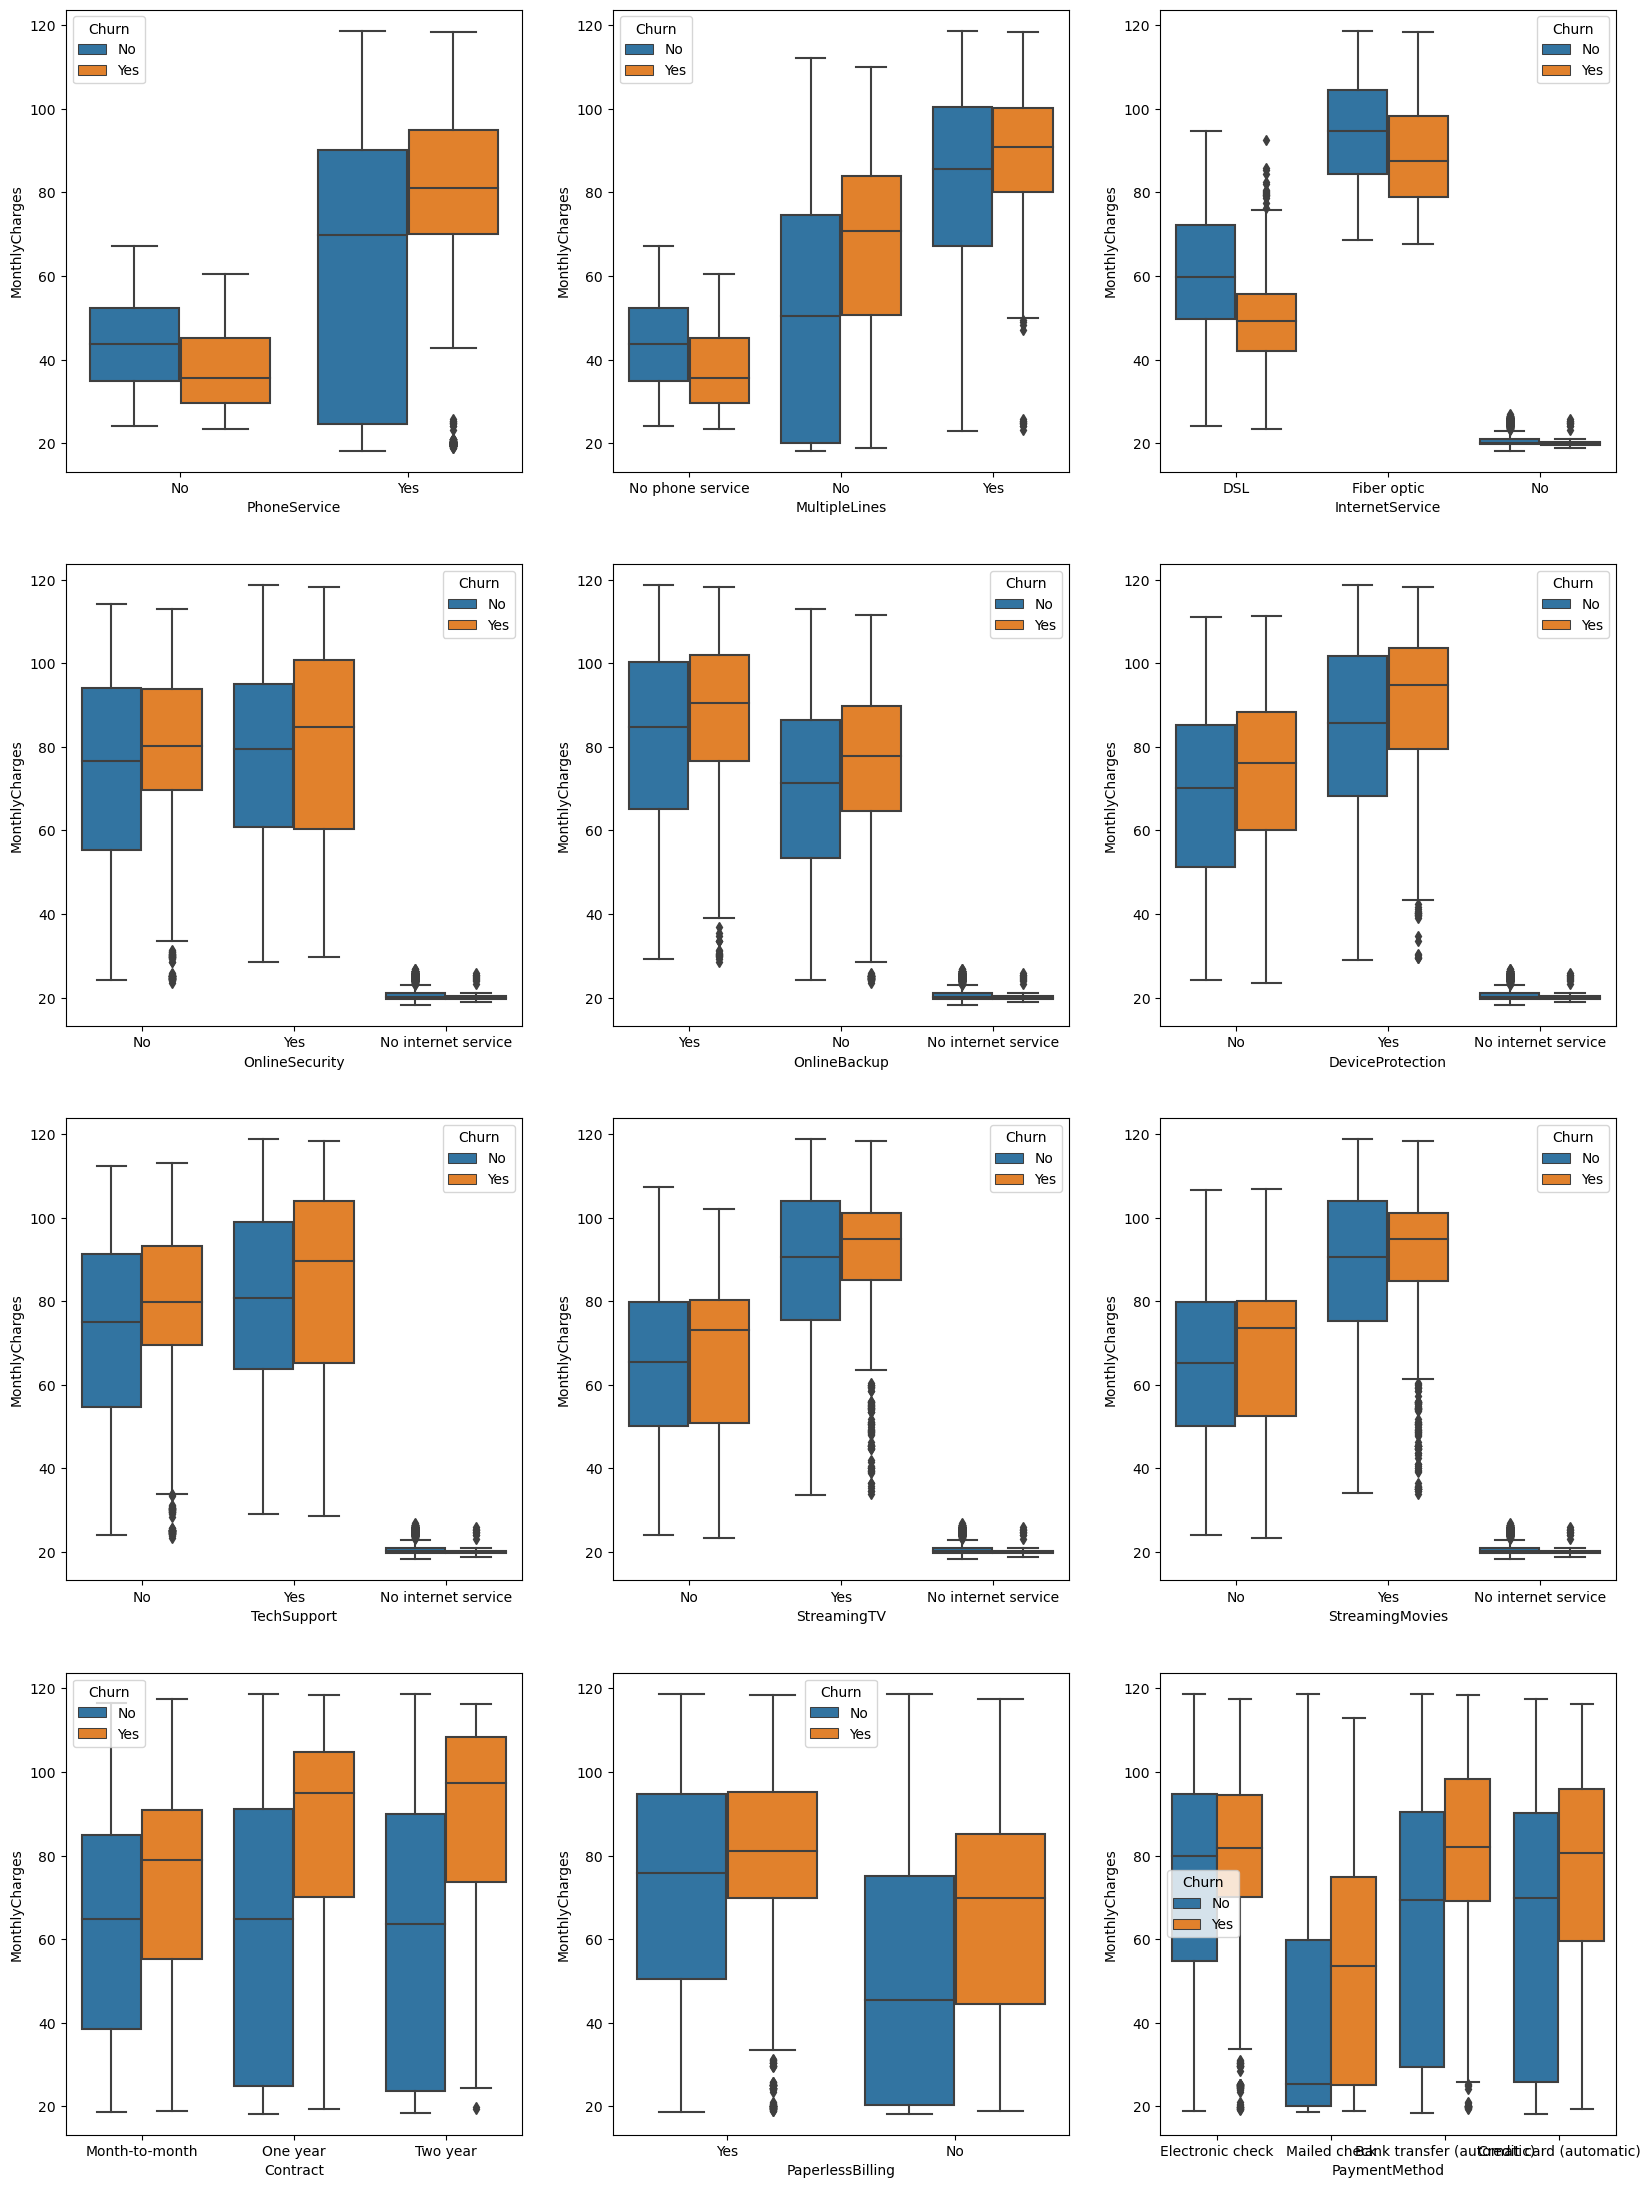

In [25]:
columns={'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6, 'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}
plt.figure(figsize=(20,42))
for key, value in columns.items():
  plt.subplot(6, 3, value)
  sns.boxplot(x=key,y='MonthlyCharges',hue='Churn',data=df_new_col);

<AxesSubplot:>

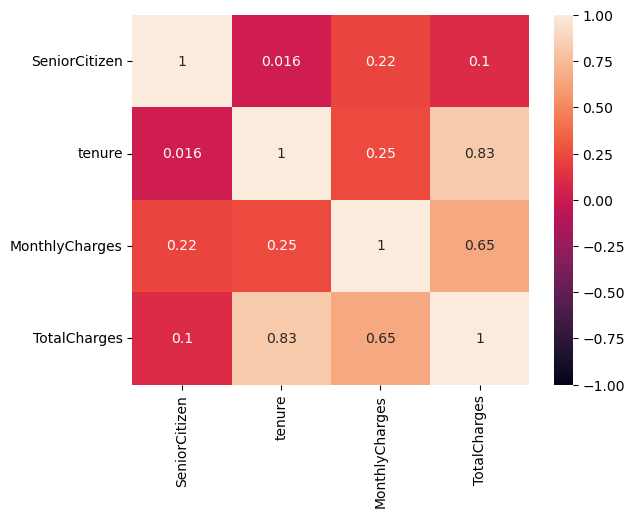

In [26]:
sns.heatmap(df_new_col.corr(), vmin = -1, vmax = 1, annot = True)

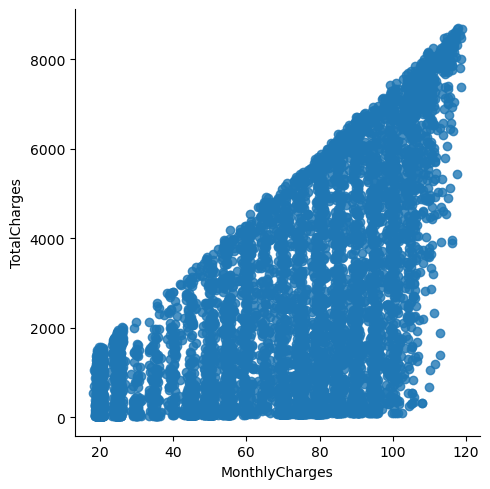

In [27]:
sns.lmplot(data=df_new_col, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [28]:
#Data Transformation
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')
df_new_col.replace('No internet service','No',inplace=True)
df_new_col.replace('No phone service','No',inplace=True)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df_new_col[col].replace({'Yes':1,'No':0},inplace=True)
for col in df_new_col:
  print(f'{col}: {df_new_col[col].unique()}')
df_new_col['gender'].replace({'Female':1,'Male':0},inplace=True)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [29]:
#one hot encoding for InternetService,Contract,PaymentMethod
df_new_columns = pd.get_dummies(data=df_new_col, columns=['InternetService','Contract','PaymentMethod'])
df_new_columns.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
#After doing the transformation for categorical variable printing the frist five rows
df_new_columns.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
#Data transformation for numerical value
float_col=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df_new_columns[float_col]= MMS.fit_transform(df_new_columns[float_col])
df_new_columns.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [32]:
#Dependent and Independent
X = df_new_columns.drop(columns=['Churn'])
Y = df_new_columns['Churn']

In [33]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state= 42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4922, 26) (2110, 26) (4922,) (2110,)


In [34]:
#Apply the logistic regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test= LR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [35]:
#generating the roc_auc curve
from sklearn.metrics import roc_curve,roc_auc_score
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = LR.predict_proba(X_test) [:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="AUC ROC Curve with Area Under the curve "+str(auc)) 
    plt.legend(loc=4)
    plt.show()

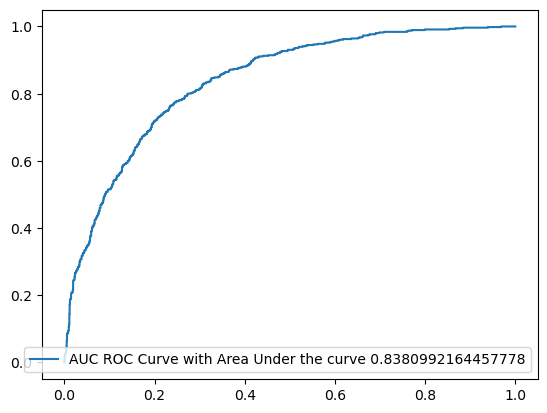

In [36]:
generate_auc_roc_curve(LR,X_test)

<AxesSubplot:xlabel='Churn', ylabel='count'>

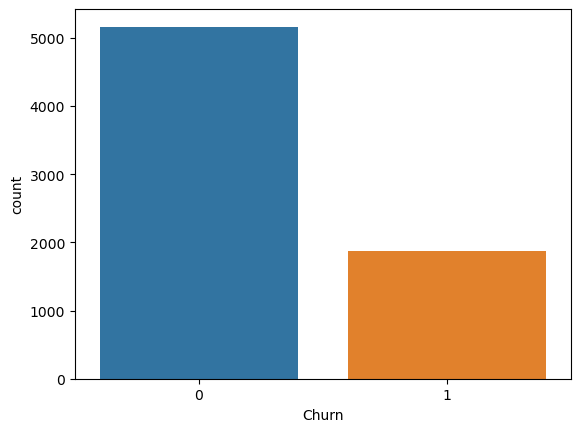

In [37]:
sns.countplot(x = 'Churn',data = df_new_columns)

In [38]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.combine import SMOTEENN
SM = SMOTEENN()
X_New, Y_New = SM.fit_resample(X,Y)
X_New_Train,X_New_Test,Y_New_Train,Y_New_Test=train_test_split(X_New, Y_New,test_size=0.3,random_state = 42)

In [40]:
print(X_New_Train.shape,X_New_Test.shape,Y_New_Train.shape,Y_New_Test.shape)

(4351, 26) (1866, 26) (4351,) (1866,)


In [41]:
#Apply the logistic regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_New_Train,Y_New_Train)
Y_pred_train = LR.predict(X_New_Train)
Y_pred_test= LR.predict(X_New_Test)
from sklearn.metrics import classification_report
print(classification_report(Y_New_Test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       862
           1       0.93      0.94      0.94      1004

    accuracy                           0.93      1866
   macro avg       0.93      0.93      0.93      1866
weighted avg       0.93      0.93      0.93      1866



In [42]:
#generating the roc_auc curve
from sklearn.metrics import roc_curve,roc_auc_score
def generate_auc_roc_curve(clf, X_New_Test):
    y_pred_proba = LR.predict_proba(X_New_Test) [:, 1]
    fpr, tpr, thresholds = roc_curve(Y_New_Test, y_pred_proba)
    auc = roc_auc_score(Y_New_Test, y_pred_proba)
    plt.plot(fpr, tpr, label="AUC ROC Curve with Area Under the curve "+str(auc)) 
    plt.legend(loc=4)
    plt.show()

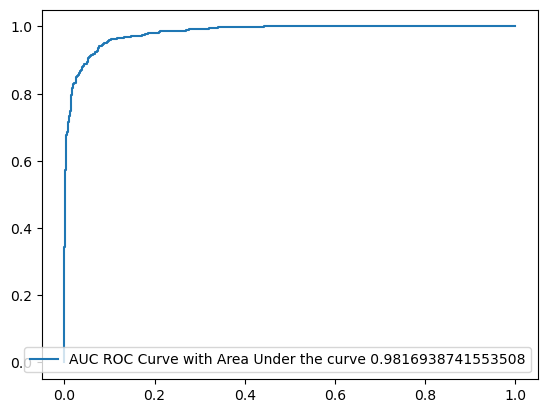

In [43]:
generate_auc_roc_curve(LR,X_New_Test)

In [44]:
#model validation for Logistic Regression 
from sklearn.model_selection import StratifiedKFold,cross_val_score
K = StratifiedKFold(n_splits = 10)
result_lr = cross_val_score(LR,X_New,Y_New,cv = K)
print(result_lr)

[0.92282958 0.92282958 0.89871383 0.94051447 0.9340836  0.92604502
 0.94051447 0.93719807 0.9194847  0.90982287]


In [45]:
print("K Fold for logistic regression is",np.mean(result_lr).round(2))

K Fold for logistic regression is 0.93


Support Vector Classifier

In [53]:
#Hyper Prameter for SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'rbf'],
              'degree' : [2,4,6,8,10]
}
grid_result  = GridSearchCV(svc,param_grid,cv = 5,n_jobs = -1)
grid_result_KNN = grid_result.fit(X_New_Test,Y_New_Test)
print(grid_result_KNN.best_params_)
print(grid_result_KNN.best_score_)

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.9394474631188082


In [54]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',degree=2,gamma = 0.1)
svm.fit(X_New_Train, Y_New_Train)
Y_predtrain_SVM = svm.predict(X_New_Train)
Y_predtest_SVM = svm.predict(X_New_Test)
from sklearn.metrics import classification_report
print(classification_report(Y_New_Test,Y_predtest_SVM))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       862
           1       0.94      0.95      0.94      1004

    accuracy                           0.94      1866
   macro avg       0.94      0.94      0.94      1866
weighted avg       0.94      0.94      0.94      1866



In [55]:
#model validation for  SVM classifier
from sklearn.model_selection import KFold,cross_val_score
K = KFold(n_splits = 5)
result_SVM = cross_val_score(svm,X_New,Y_New,cv = K)
print(result_SVM)

[0.88022508 0.86334405 0.92920354 0.93966211 0.92759453]


In [56]:
print("K Fold for SVM Classifier is",np.mean(result_SVM).round(2))

K Fold for SVM Classifier is 0.91


Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()
param_grid ={
    'criterion' : ['gini','entropy'],
    'max_depth' : [4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split' : [2,5,7,9,10]
}
grid_result  = GridSearchCV(DT,param_grid,cv = 5,n_jobs = -1)
grid_result_DT = grid_result.fit(X_New_Test,Y_New_Test)
print(grid_result_DT.best_params_)
print(grid_result_DT.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 9}
0.9330045447377098


In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 6, min_samples_leaf = 1,min_samples_split = 2) 
dt.fit(X_New_Train, Y_New_Train)
Y_predtrain_dt = dt.predict(X_New_Train) 
Y_predtest_dt = dt.predict(X_New_Test) 
from sklearn.metrics import classification_report
print(classification_report(Y_New_Test,Y_predtest_dt))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       862
           1       0.94      0.92      0.93      1004

    accuracy                           0.92      1866
   macro avg       0.92      0.93      0.92      1866
weighted avg       0.93      0.92      0.93      1866



In [59]:
#model validation for Decision Tree classifier
from sklearn.model_selection import KFold,cross_val_score
K = KFold(n_splits = 5)
result_DT = cross_val_score(dt,X_New,Y_New,cv = K)
print(result_DT)

[0.88102894 0.86897106 0.92115849 0.9074819  0.91150442]


In [61]:
print("K Fold for Decision Tree Classifier is",np.mean(result_DT).round(2))

K Fold for Decision Tree Classifier is 0.9


Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier()
param_grid ={
    'n_estimators' : [200, 300, 400, 500],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4, 5, 6],
    'min_samples_split' : [2, 5, 10]
}
grid_result  = GridSearchCV(RFC,param_grid,cv = 5,n_jobs = -1)
grid_result_RFC = grid_result.fit(X_New_Test,Y_New_Test)
print(grid_result_RFC.best_params_)
print(grid_result_RFC.best_score_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 400}
0.9383736433886252


In [63]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 500,max_depth = 4, min_samples_split = 2,max_features = 'auto') 
RFC.fit(X_New_Train, Y_New_Train)
Y_predtrain_rfc = RFC.predict(X_New_Train) 
Y_predtest_rfc = RFC.predict(X_New_Test) 
from sklearn.metrics import classification_report
print(classification_report(Y_New_Test,Y_predtest_rfc))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       862
           1       0.91      0.95      0.93      1004

    accuracy                           0.92      1866
   macro avg       0.92      0.92      0.92      1866
weighted avg       0.92      0.92      0.92      1866



In [64]:
#model validation for Random Forest classifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
K = StratifiedKFold(n_splits = 10)
result_rfc = cross_val_score(RFC,X_New,Y_New,cv = K)
print(result_rfc)

[0.92122186 0.92282958 0.91157556 0.93890675 0.92604502 0.91157556
 0.92604502 0.92431562 0.90499195 0.88244767]


In [65]:
print("StratifiedKFold for Random Forest Classifier is",np.mean(result_rfc).round(2))

StratifiedKFold for Random Forest Classifier is 0.92


xgboost Classifier

In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier()
param_grid = {
    'learning_rate'    : [0.1,0.01,0.2,0.3,0.02,0.001] ,
     'max_depth'        : [ 3, 4, 5, 6, 8],
     'gamma'            : [  0.1, 0.2 , 0.3, 0.4 ]
}
grid_result = GridSearchCV(xgb_model, param_grid, cv=5,n_jobs = -1, scoring='accuracy')
grid_result_XGB = grid_result.fit(X_New_Test,Y_New_Test)
print(grid_result_XGB.best_params_)
print(grid_result_XGB.best_score_)

{'gamma': 0.4, 'learning_rate': 0.01, 'max_depth': 8}
0.9415778985247523


In [67]:
import xgboost as xgb
XGB = xgb.XGBClassifier(gamma =0.4,max_depth = 8, learning_rate = 0.01) 
XGB.fit(X_New_Train, Y_New_Train)
Y_predtrain_xgb = XGB.predict(X_New_Train) 
Y_predtest_xgb = XGB.predict(X_New_Test) 
from sklearn.metrics import classification_report
print(classification_report(Y_New_Test,Y_predtest_xgb))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       862
           1       0.94      0.95      0.95      1004

    accuracy                           0.94      1866
   macro avg       0.94      0.94      0.94      1866
weighted avg       0.94      0.94      0.94      1866



In [68]:
#model validation for XG Boost classifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
K = StratifiedKFold(n_splits = 10)
result_xgb = cross_val_score(XGB,X_New,Y_New,cv = K)
print(result_xgb)

[0.93247588 0.9437299  0.92604502 0.94051447 0.9437299  0.94533762
 0.94051447 0.95008052 0.94041868 0.93075684]


In [69]:
print("StratifiedKFold for XG Boosting Classifier is",np.mean(result_xgb).round(2))

StratifiedKFold for XG Boosting Classifier is 0.94


In [75]:
#importing the pickle library
import pickle

In [76]:
filename = 'app.sav'
pickle.dump(XGB, open(filename, 'wb'))

In [77]:
model_load = pickle.load(open(filename, 'rb'))
model_score = model_load.score(X_New_Test, Y_New_Test)
model_score

0.9415862808145766

In [ ]:
#The final model is XGBoost